In [1]:
%pylab inline 
import geopandas as gpd 
import rasterio as rio 
import rasterio.mask as mask
import os 
from gis_functions import clip_raster_to_geometry, clip_shp_to_geometry
from sinkhole_functions import calc_karst_fraction

Populating the interactive namespace from numpy and matplotlib


In [2]:
datadir = '/home/mcoving/github/sinkhole_analysis/'
basedir = '/home/mcoving/Dropbox/sync/projects/Dolines/'
hu10 = gpd.read_file(basedir+'USGS-NHD-DEMs/GDB/NHDPLUS_H_0511_HU4_GDB.gdb', layer='WBDHU10')

In [24]:
#Load Little Barren River HUC10
lbr = hu10[hu10.HUC10 == '0511000106']
lbr.crs 

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [4]:
rasterdir = os.path.join(basedir,'USGS-NHD-DEMs/Rasters/HRNHDPlusRasters0511/')
rasterfile = 'elev_cm.tif'
img = clip_raster_to_geometry(rasterdir=rasterdir,
                              rasterfile=rasterfile,
                              geom_df=lbr,
                              clipname='HUC-0511000106-')

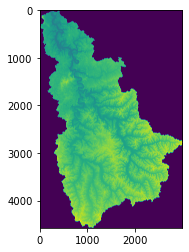

<AxesSubplot:>

In [5]:
import rasterio.plot as riop 
riop.show(img)

In [6]:
sinks = clip_shp_to_geometry(clipname='HUC-0511000106-sinks-', 
                             shpdir=os.path.join(basedir, 'Kentucky','kysinks'),
                             shpfile='kentucky_sinkholes.shp',
                             geom_df=lbr
                             )

In [12]:
sinks.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - onshore and offshore: Canada - Alberta; British Columbia; Manitoba; New Brunswick; Newfoundland and Labrador; Northwest Territories; Nova Scotia; Nunavut; Ontario; Prince Edward Island; Quebec; Saskatchewan; Yukon. Puerto Rico. United States (USA) - Alabama; Alaska; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Hawaii; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming. US Virgin Islands.  British Virgin Island

In [7]:
sinksfile = os.path.join(basedir,'HUC-0511000106-sinks-kentucky_sinkholes.shp')
wat = calc_karst_fraction(datadir=datadir,
                          demfile='HUC-0511000106-elev_cm.tif',
                          sinksfile=sinksfile)

./whitebox_tools --run="MeanFilter" --input='/home/mcoving/github/sinkhole_analysis/HUC-0511000106-elev_cm.tif' --output='/home/mcoving/github/sinkhole_analysis/HUC-0511000106-elev_cm-smoothed.tif' --filterx=5 --filtery=5

****************************
* Welcome to MeanFilter    *
* Powered by WhiteboxTools *
* www.whiteboxgeo.com      *
****************************
Reading data...
Creating integral images: 0%
Creating integral images: 1%
Creating integral images: 2%
Creating integral images: 3%
Creating integral images: 4%
Creating integral images: 5%
Creating integral images: 6%
Creating integral images: 7%
Creating integral images: 8%
Creating integral images: 9%
Creating integral images: 10%
Creating integral images: 11%
Creating integral images: 12%
Creating integral images: 13%
Creating integral images: 14%
Creating integral images: 15%
Creating integral images: 16%
Creating integral images: 17%
Creating integral images: 18%
Creating integral images: 19%
Creating integral images: 

In [8]:
t2 = rio.open('/home/mcoving/github/sinkhole_analysis/test2.tif')

In [63]:
t2_img = t2.read()
t2_img[t2_img>0]

array([], dtype=int32)

In [13]:
from whitebox.whitebox_tools import WhiteboxTools
wbt = WhiteboxTools()

In [14]:
wbt.vector_polygons_to_raster(os.path.join(datadir,'HUC-0511000106-sinks-kentucky_sinkholes.shp'),
                              os.path.join(datadir, 'test2.tif'), nodata=0,
                              base=os.path.join(datadir, 'HUC-0511000106-elev_cm.tif')
                               )       

./whitebox_tools --run="VectorPolygonsToRaster" --input='/home/mcoving/github/sinkhole_analysis/HUC-0511000106-sinks-kentucky_sinkholes.shp' --field=FID --output='/home/mcoving/github/sinkhole_analysis/test2.tif' --base='/home/mcoving/github/sinkhole_analysis/HUC-0511000106-elev_cm.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%
Reading attributes: 20%
Reading att

0

In [15]:
demsrc = rio.open(datadir+'HUC-0511000106-elev_cm.tif')
demimg = demsrc.read()

In [16]:
demsrc.crs

CRS.from_wkt('PROJCS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101004,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]')

In [19]:
testshp = sinks.to_crs(demsrc.crs)

In [22]:
testshp.to_file(datadir+'testshp.shp')

In [23]:
wbt.vector_polygons_to_raster(os.path.join(datadir,'testshp.shp'),
                              os.path.join(datadir, 'test2.tif'), nodata=0,
                              base=os.path.join(datadir, 'HUC-0511000106-elev_cm.tif')
                               )       

./whitebox_tools --run="VectorPolygonsToRaster" --input='/home/mcoving/github/sinkhole_analysis/testshp.shp' --field=FID --output='/home/mcoving/github/sinkhole_analysis/test2.tif' --base='/home/mcoving/github/sinkhole_analysis/HUC-0511000106-elev_cm.tif'

*************************************
* Welcome to VectorPolygonsToRaster *
* Powered by WhiteboxTools          *
* www.whiteboxgeo.com               *
*************************************
Reading data...
Reading attributes: 0%
Reading attributes: 1%
Reading attributes: 2%
Reading attributes: 3%
Reading attributes: 4%
Reading attributes: 5%
Reading attributes: 6%
Reading attributes: 7%
Reading attributes: 8%
Reading attributes: 9%
Reading attributes: 10%
Reading attributes: 11%
Reading attributes: 12%
Reading attributes: 13%
Reading attributes: 14%
Reading attributes: 15%
Reading attributes: 16%
Reading attributes: 17%
Reading attributes: 18%
Reading attributes: 19%
Reading attributes: 20%
Reading attributes: 21%
Reading attributes:

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rasterizing 262 of 1186: 11400%
Rasterizing 262 of 1186: 11412%
Rasterizing 262 of 1186: 11425%
Rasterizing 262 of 1186: 11437%
Rasterizing 262 of 1186: 11450%
Rasterizing 262 of 1186: 22%
Rasterizing 263 of 1186: 12542%
Rasterizing 263 of 1186: 12557%
Rasterizing 263 of 1186: 12571%
Rasterizing 263 of 1186: 12585%
Rasterizing 263 of 1186: 12600%
Rasterizing 263 of 1186: 12614%
Rasterizing 263 of 1186: 12628%
Rasterizing 263 of 1186: 22%
Rasterizing 264 of 1186: 2467%
Rasterizing 264 of 1186: 2470%
Rasterizing 264 of 1186: 2472%
Rasterizing 264 of 1186: 2475%
Rasterizing 264 of 1186: 2478%
Rasterizing 264 of 1186: 2481%
Rasterizing 264 of 1186: 2483%
Rasterizing 264 of 1186: 2486%
Rasterizing 264 of 1186: 2489%
Rasterizing 264 of 1186: 2491%
Rasterizing 264 of 1186: 2494%
Rasterizing 264 of 1186: 2497%
Rasterizing 264 of 1186: 2500%
Rasterizing 264 of 1186: 2502%
Rasterizing 264 of 1186: 2505%
Rasterizing 264 of 1186: 2508%
Rasterizing 264 of 1186: 2510%
Rasterizing 264 of 1186: 2513%


IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rasterizing 546 of 1186: 13700%
Rasterizing 546 of 1186: 13707%
Rasterizing 546 of 1186: 13715%
Rasterizing 546 of 1186: 13723%
Rasterizing 546 of 1186: 13730%
Rasterizing 546 of 1186: 46%
Rasterizing 547 of 1186: 44650%
Rasterizing 547 of 1186: 44675%
Rasterizing 547 of 1186: 44700%
Rasterizing 547 of 1186: 44725%
Rasterizing 547 of 1186: 46%
Rasterizing 548 of 1186: 5671%
Rasterizing 548 of 1186: 5675%
Rasterizing 548 of 1186: 5678%
Rasterizing 548 of 1186: 5681%
Rasterizing 548 of 1186: 5684%
Rasterizing 548 of 1186: 5687%
Rasterizing 548 of 1186: 5690%
Rasterizing 548 of 1186: 5693%
Rasterizing 548 of 1186: 5696%
Rasterizing 548 of 1186: 5700%
Rasterizing 548 of 1186: 5703%
Rasterizing 548 of 1186: 5706%
Rasterizing 548 of 1186: 5709%
Rasterizing 548 of 1186: 5712%
Rasterizing 548 of 1186: 5715%
Rasterizing 548 of 1186: 5718%
Rasterizing 548 of 1186: 5721%
Rasterizing 548 of 1186: 5725%
Rasterizing 548 of 1186: 5728%
Rasterizing 548 of 1186: 5731%
Rasterizing 548 of 1186: 5734%
Ras

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Rasterizing 899 of 1186: 10166%
Rasterizing 899 of 1186: 75%
Rasterizing 900 of 1186: 30675%
Rasterizing 900 of 1186: 30700%
Rasterizing 900 of 1186: 30725%
Rasterizing 900 of 1186: 30750%
Rasterizing 900 of 1186: 75%
Rasterizing 901 of 1186: 11980%
Rasterizing 901 of 1186: 11990%
Rasterizing 901 of 1186: 12000%
Rasterizing 901 of 1186: 12010%
Rasterizing 901 of 1186: 12020%
Rasterizing 901 of 1186: 12030%
Rasterizing 901 of 1186: 12040%
Rasterizing 901 of 1186: 12050%
Rasterizing 901 of 1186: 12060%
Rasterizing 901 of 1186: 12070%
Rasterizing 901 of 1186: 75%
Rasterizing 902 of 1186: 6794%
Rasterizing 902 of 1186: 6800%
Rasterizing 902 of 1186: 6805%
Rasterizing 902 of 1186: 6811%
Rasterizing 902 of 1186: 6816%
Rasterizing 902 of 1186: 6822%
Rasterizing 902 of 1186: 6827%
Rasterizing 902 of 1186: 6833%
Rasterizing 902 of 1186: 6838%
Rasterizing 902 of 1186: 6844%
Rasterizing 902 of 1186: 6850%
Rasterizing 902 of 1186: 6855%
Rasterizing 902 of 1186: 6861%
Rasterizing 902 of 1186: 6866%

IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)

